In [ ]:
#CONCLUSIONS
#KPI 1: Measure the amount of rides on different weather conditions and
#  define reccomendations to fit pricing matrices in accordance with weather patterns.
    #SMART - A specific, measurable, and attainable goal for a sales team 
    # to increase revenue in a particular region by a certain percentage within a specific timeframe 
        #S measure "total rides" column and how the data set relates to the feature: climate, and alternately other significant features like temperature etc.
            #in EDA: in weather x, total rides are low, how to increase for specific section
        #M measure how many rides are taken on a recommended (likely warm, temperate, dry) day, see if there are any patterns
            #What ratio of total rides on a warm vs cold, and trying to give initive raise total rides on cold days

        #A measure weekly to benchmark initial observed patterns (could extrapolate data to further enhance predictions)
            #what patterns would be desired? what are the desired increase be, what do we change if we arent reaching it?
        #R more rides translate to more bike usage and therefore less congestion/elivating city congestion pressure
            
        #T measure 6 month period (enough for at least 1 season switch) and design machine learning algorithm,
            #to predict how well we can estimate total rides on a given day (with a specific climate) 

#KPI 2: Measure the impact of holidays on the usage of casual users
#  more casual users translates into more app exposure/more long term subscription, steady customers 
# - promotions on holidays/weekends could be a easy way to gain more app users
    #SMART
        #S:By investigating historical data we can gain an overview of key holidays (4th of July?) 
        # where casual member usage spikes the most
        # M: measure difference between climate wise identical days but then holiday vs / no holiday, investigate for correlations (boxplot)
        #A: implimenting discounts or observing user numbers on past & future holiday day data 
        # (and maybe usage +/- 2 days before and after holiday) 
        # would provide insight into the trends at hand and help evaluate if further investigation is necessary
        #R By targeting days that have spikes in new user interactions (casual users) - 
            #one could impliment:
        #  targeted discounts, free rides, referral promotions, give aways, sales, merch, 
        # targeted advertisement and data collection 
        # To enhance potential sales and stimulate long term user engagement. Increase in profit could translate to a decrease in prices for customers long term, improving the "transport" deal




In [92]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import holidays 

In [93]:
#MACHINE LEARNING IMPORTS

#DATA PROCESSING
#Encoding
from sklearn.preprocessing import LabelEncoder
#Second label encoder we are trying later
from sklearn.preprocessing import OneHotEncoder

#splitting data
from sklearn.model_selection import train_test_split

#Normalizing after split, as intended to prevent data leakage
from sklearn.preprocessing import MinMaxScaler

#MACHINE LEARNING MODESL
  #Random Forest 
from sklearn.ensemble import RandomForestClassifier
  #Logistic reg
from sklearn.linear_model import LogisticRegression
  #Decision tree classifier

from sklearn.tree import DecisionTreeClassifier


#Model eval
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

#Classification reports
from sklearn.metrics import accuracy_score, classification_report

#Kappa score
from sklearn.metrics import cohen_kappa_score

#Confusion matrix
from sklearn.metrics import confusion_matrix

#cross val scoring 
from sklearn.model_selection import cross_val_score

In [94]:

#POSSIBLE PLOTS:
#x percentage of casual users vs members on weekend vs week days
#x total members on weather code 0 (no clouds) vs total members weather code 65 (raining, heavy at time of ob.) 

In [95]:
df_daily = pd.read_csv("Data_raw\CBS_2021-2023_Daily_Weather.csv",sep = ",")

df_daily.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Leon\AppData\Local\Temp\ipykernel_14948\1753049123.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_daily = pd.read_csv("Data_raw\CBS_2021-2023_Daily_Weather.csv",sep = ",")


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [96]:
df_daily.dtypes
df_daily.columns = df_daily.columns.str.lower()

In [97]:
# Checking for NULLs in the data
df_daily.isnull().sum()
if_dupped = df_daily.duplicated()

#No dupliates
for elements in if_dupped:
    if elements == "True":
        print(elements)
    else:
        pass
    

In [98]:
#has no null data:
#casual                            0
#date                              0
#member                            0
#total_rides                       0
#apparent_temperature_mean (°c)    0
#temperature_2m_mean (°c)          0
#weathercode (wmo code)            0
#windspeed_10m_max (km/h)          0
#climate                           0
#weekday                           0
#weekday_name                      0


In [99]:
df_daily.head(5)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [100]:
df_daily["climate"] = df_daily["apparent_temperature_mean (°c)"].apply(lambda value: "cold"
                                                                if value <= 5 else "temperate"
                                                                if value <= 15 else "warm"
                                                                ) 

df_daily["climate"] = pd.Categorical(df_daily["climate"], categories = ["cold","temperate","warm"])


df_daily.dtypes

casual                               int64
date                                object
member                               int64
total_rides                          int64
apparent_temperature_mean (°c)     float64
temperature_2m_mean (°c)           float64
weathercode (wmo code)               int64
windspeed_10m_max (km/h)           float64
climate                           category
dtype: object

In [101]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily['weathercode (wmo code)'] = df_daily['weathercode (wmo code)'].astype('category')


In [102]:
df_daily.dtypes

casual                                     int64
date                              datetime64[ns]
member                                     int64
total_rides                                int64
apparent_temperature_mean (°c)           float64
temperature_2m_mean (°c)                 float64
weathercode (wmo code)                  category
windspeed_10m_max (km/h)                 float64
climate                                 category
dtype: object

In [103]:
# extract weekdays using dt.dayofweek
df_daily['weekday'] = df_daily['date'].dt.dayofweek



In [104]:
# extract weekdays using dt.day_name()
df_daily['weekday_name'] = df_daily['date'].dt.day_name()
df_daily['is_weekend'] = df_daily["date"].dt.weekday >= 5

In [105]:


df_daily.head(5)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False


In [106]:
uniques = df_daily["weathercode (wmo code)"].unique()

#print(len(uniques))
indices = np.argsort(uniques)
ordered_arr = uniques[indices]

for elements in ordered_arr:
    print(elements)

code_map = {
0:"Cloud development not observed or not observable",                  
1:"Cloud generally dissolving or becoming less developed",                  
2:"State of sky on the whole unchanged",                                
3:"Clouds generally forming or developing",
51:"Drizzle, not freezing, continuous, slight at time of ob.",
53:"Drizzle, not freezing, continuous, moderate at time of ob.",                           
55:"Drizzle, not freezing, continuous, heavy at time of ob.",
61:"Rain, not freezing, continuous, slight at time of ob.",                                  
63:"Rain, not freezing, continuous, moderate at time of ob.",                
65:"Rain, not freezing, continuous, heavy at time of ob.",
71:"Continuous fall of snowflakes, slight at time of ob.",
73:"Continuous fall of snowflakes, moderate at time of ob.",
75:"Continuous fall of snowflakes, heavy at time of ob."}

weather_type_map = {
0:"Sunny",                  
1:"Sunny",                  
2:"Sunny",                                
3:"Cloudy",
51:"Drizzle",
53:"Drizzle",                           
55:"Drizzle",
61:"Rain",                                  
63:"Rain",                
65:"Rain",
71:"Snow",
73:"Snow",
75:"Snow"}

df_daily['weather_description'] = df_daily['weathercode (wmo code)'].map(code_map)


df_daily["weather_type"] = df_daily['weathercode (wmo code)'].map(weather_type_map)
df_daily.head()


0
1
2
3
51
53
55
61
63
65
71
73
75


,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False,Clouds generally forming or developing,Cloudy
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False,"Drizzle, not freezing, continuous, slight at t...",Drizzle


In [107]:
#Add column for weekday 
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily['weekday_name'] = df_daily['date'].dt.day_name()

In [108]:
us_holidays = holidays.US()
df_daily['is_holiday'] = df_daily['date'].map(lambda x: x in us_holidays)

In [109]:

df_daily["percentage_members_vs_casuals(%)"] = round((df_daily["member"]/(df_daily["casual"] + df_daily["member"]))*100,2)

df_daily.head(5)




,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain,False,69.59
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False,Clouds generally forming or developing,Cloudy,False,69.57
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False,"Drizzle, not freezing, continuous, slight at t...",Drizzle,False,65.47


In [110]:
df_daily['season'] = df_daily['date'].dt.month.map({1: 'winter',
                                                    2: 'spring', 3: 'spring', 
                                                    4: 'summer',5: 'summer',6: 'summer', 7: 'summer',
                                                    8: 'autumn',9: 'autumn', 
                                                    10: 'winter',11: 'winter',12: 'winter'})

In [111]:
#Fresh Breeze (Beaufort 5): Wind speed of 19-24 mph (30-38 km/h). 
# This is considered a moderate wind, and you may notice large branches and small trees in leaf beginning to sway.
#Strong Breeze (Beaufort 6): Wind speed of 25-31 mph (40-50 km/h). 
# At this level, whole trees in motion, and whistling sounds are heard in overhead or nearby power and telephone lines.
#Near Gale (Beaufort 7): Wind speed of 32-38 mph (51-61 km/h). 
# This is considered a strong wind, and you may notice inconvenience when walking against the wind.
#Gale (Beaufort 8): Wind speed of 39-46 mph (62-74 km/h). 
# At this level, wind breaks twigs and small branches, and generally impedes walking.
wind_dict = {}

df_daily["windiness"] = df_daily["windspeed_10m_max (km/h)"].apply(lambda value: "no_wind"
                                                                if value <= 30 else "fresh_breeze"
                                                                if value <= 38 else "strong_breeze"
                                                                if value <= 51 else "near_gale"
                                                                if value <= 62 else "gale"
                                                                ) 

df_daily["windiness"] = pd.Categorical(df_daily["windiness"], categories = ["no_wind","fresh_breeze","strong_breeze",
                                                                        "near_gale","gale"])


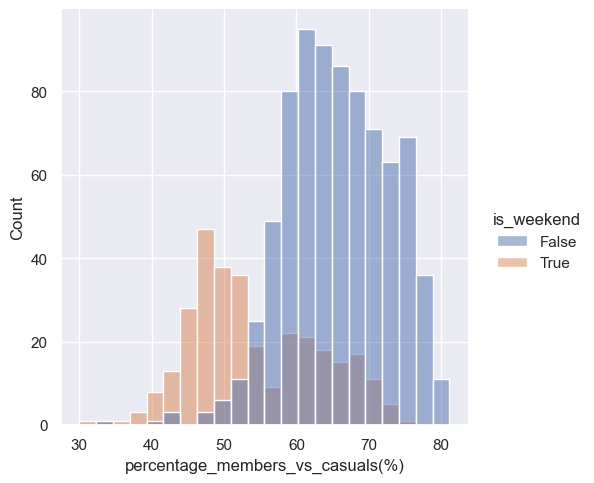

In [112]:
#percentage of casual users vs members on weekend vs week days
#sns.histplot(data=df_daily, x="percentage_members_vs_casuals(%)", hue="weekday_name")
sns.displot(data=df_daily, x="percentage_members_vs_casuals(%)", hue="is_weekend")


<Axes: xlabel='percentage_members_vs_casuals(%)', ylabel='Density'>

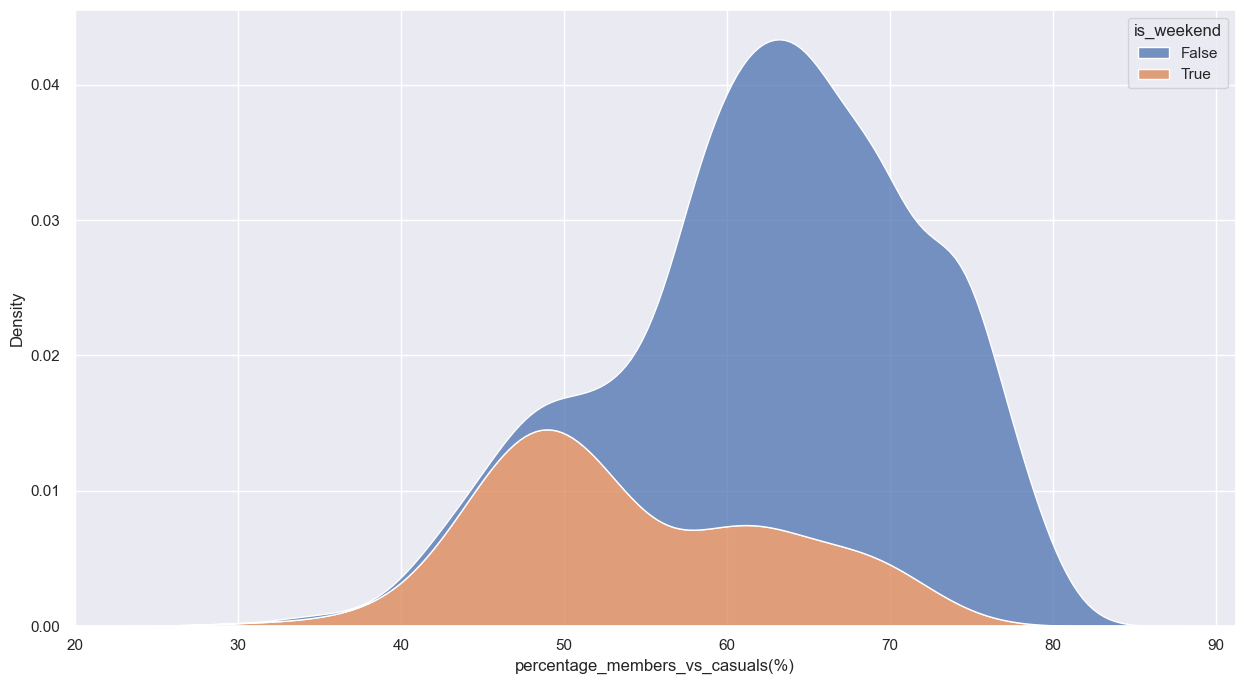

In [113]:
#sns.scatterplot(data=df_daily, x="weekday_name", y="percentage_members_vs_casuals(%)", hue="weekday_name")
sns.kdeplot(data=df_daily, x ="percentage_members_vs_casuals(%)", hue="is_weekend", multiple="stack")


<Axes: xlabel='percentage_members_vs_casuals(%)', ylabel='Density'>

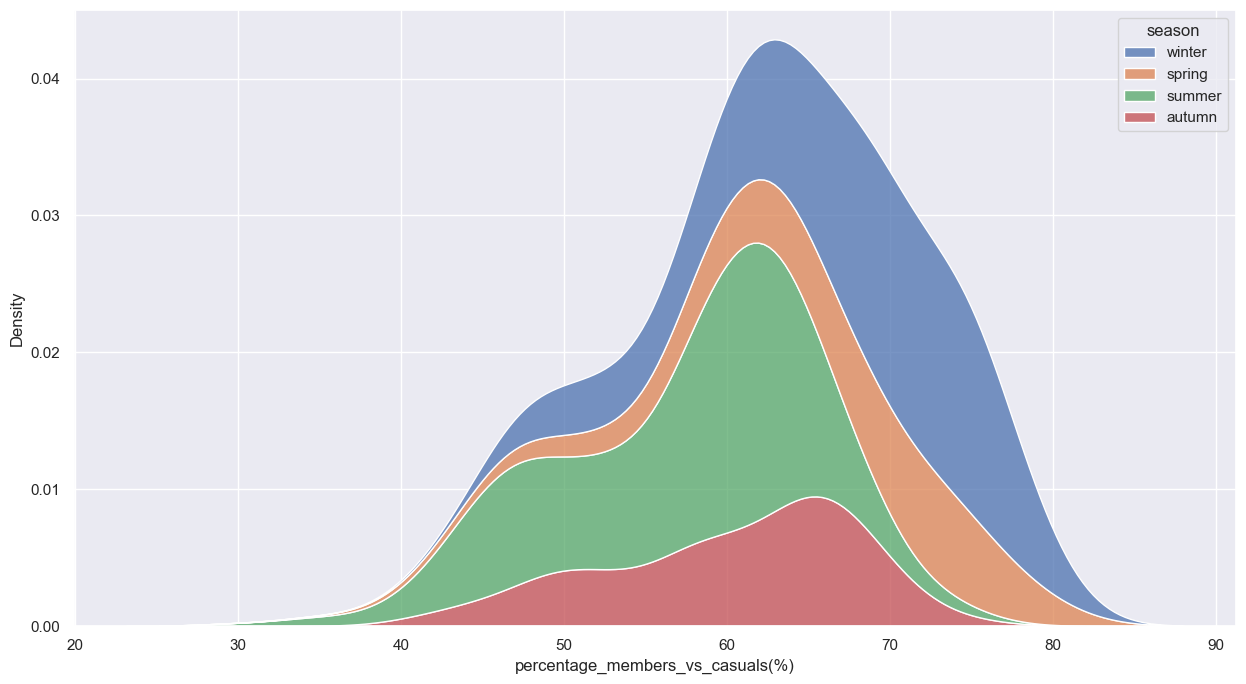

In [114]:

sns.kdeplot(data=df_daily, x ="percentage_members_vs_casuals(%)", hue="season", multiple="stack")


In [115]:
# total members on weekend vs week days DOESNT WORK, 5 vs 2 days isnt a good comparison, only ratio is 


In [116]:
df_daily.head(2)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%),season,windiness
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39,winter,no_wind
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74,winter,no_wind


<Axes: xlabel='is_weekend', ylabel='percentage_members_vs_casuals(%)'>

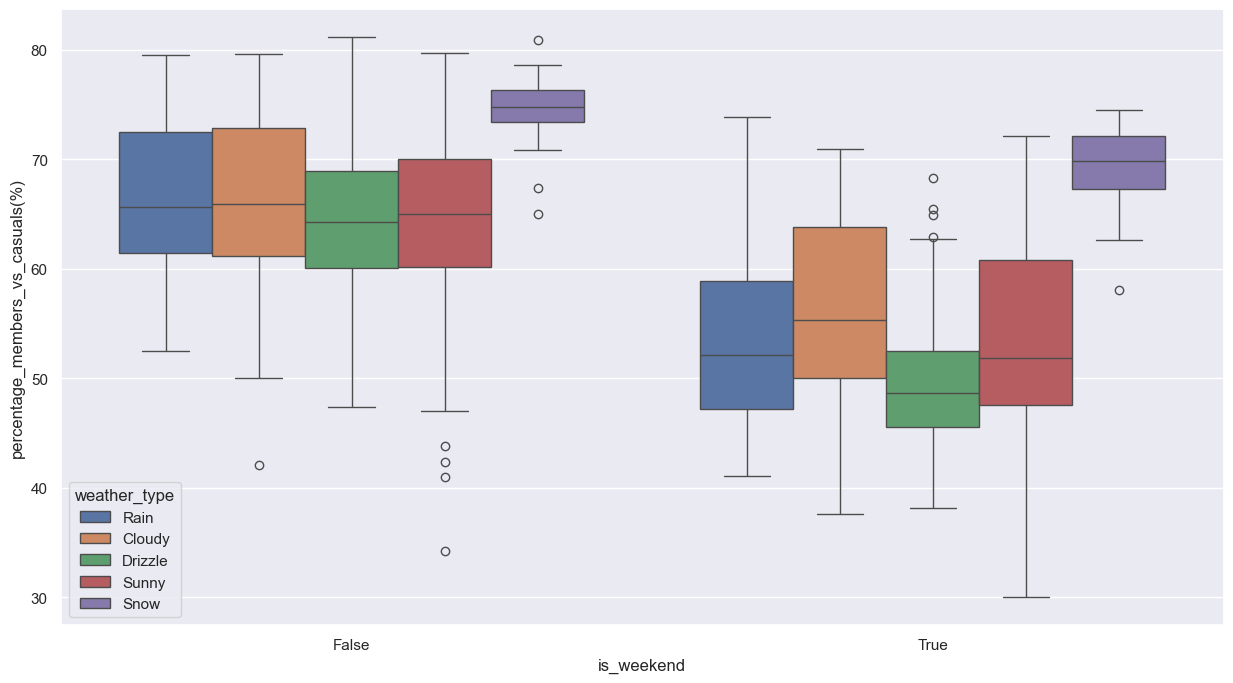

In [117]:
#percentage rides on different weathers
sns.boxplot(data=df_daily, x="is_weekend", y="percentage_members_vs_casuals(%)", hue="weather_type")

<Axes: xlabel='is_holiday', ylabel='percentage_members_vs_casuals(%)'>

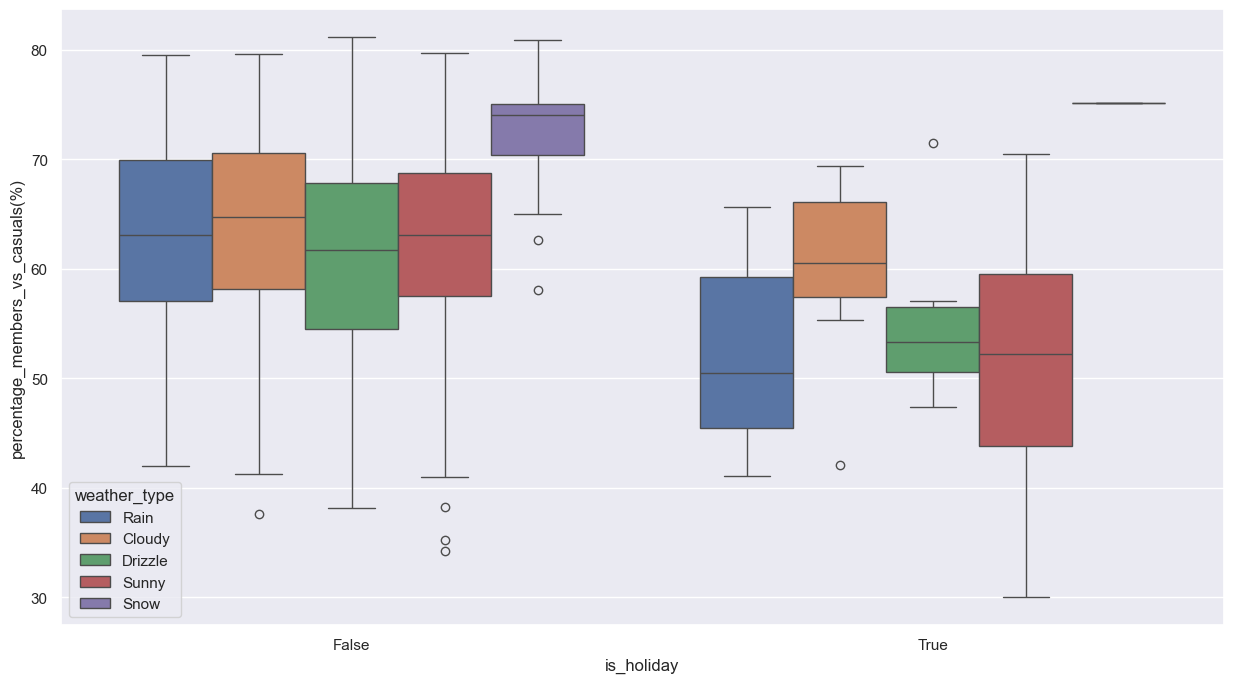

In [118]:
sns.boxplot(data=df_daily, x="is_holiday", y="percentage_members_vs_casuals(%)", hue="weather_type")

<Axes: xlabel='weather_type', ylabel='total_rides'>

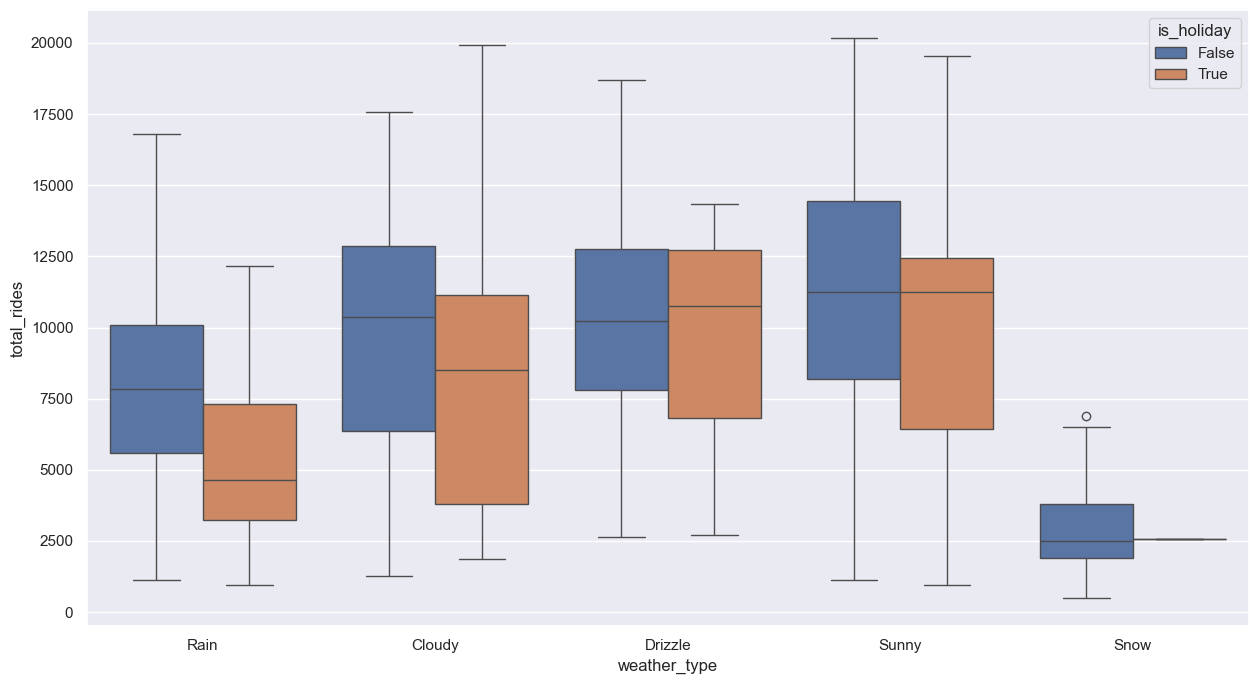

In [119]:
sns.boxplot(data=df_daily, x="weather_type", y="total_rides", hue="is_holiday")

In [120]:
df_daily.head(3)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%),season,windiness
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39,winter,no_wind
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74,winter,no_wind
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain,False,69.59,winter,no_wind


<Axes: xlabel='windiness', ylabel='total_rides'>

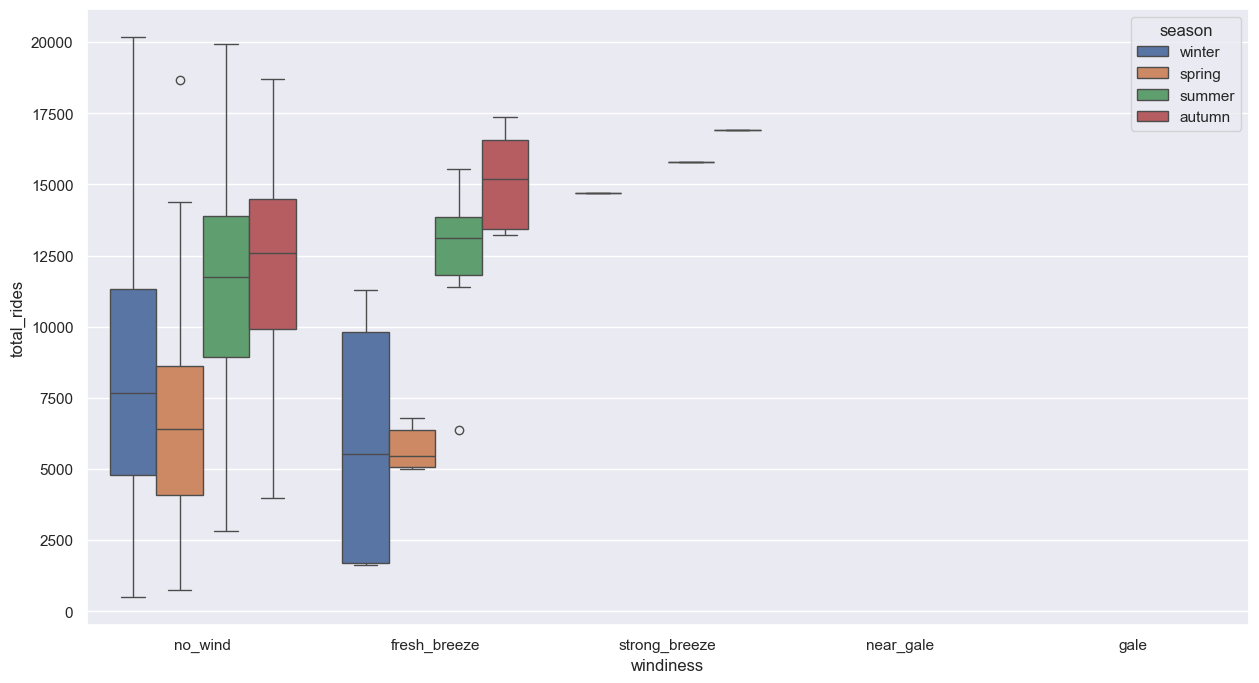

In [121]:
sns.boxplot(data=df_daily, x="windiness", y="total_rides", hue="season")

<Axes: xlabel='weather_type', ylabel='percentage_members_vs_casuals(%)'>

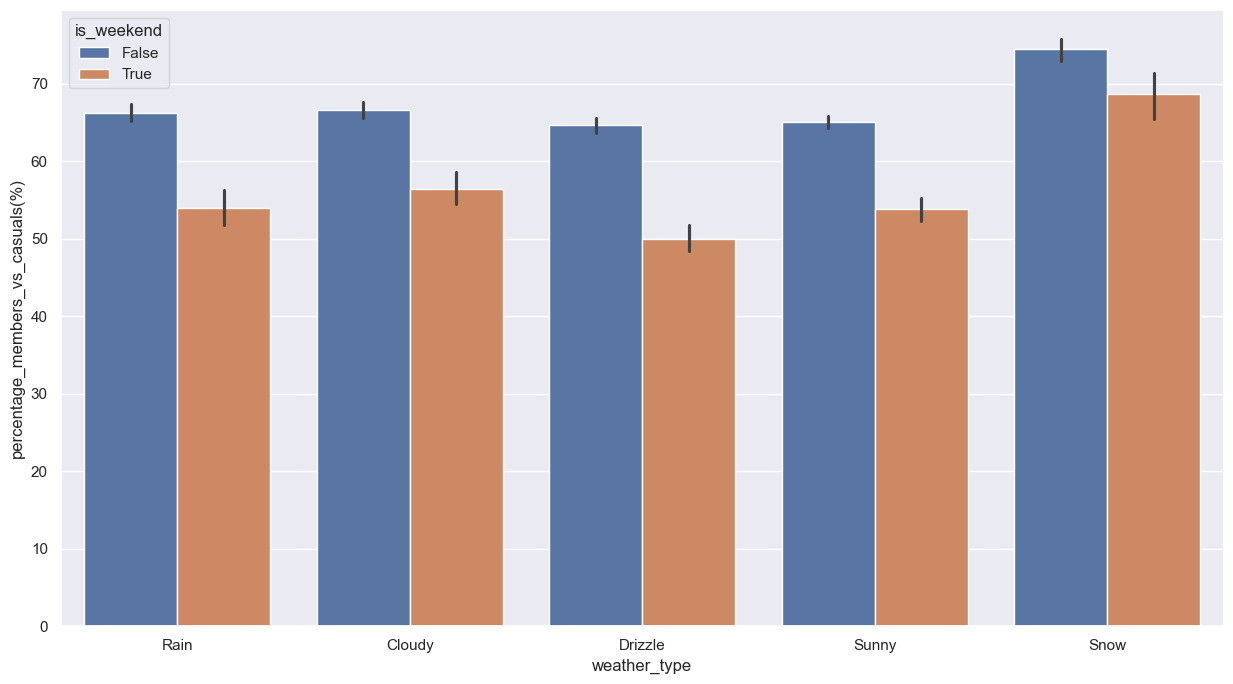

In [122]:
#Observation: you consistently have a higher ratio of member users during week days, no matter the weather

sns.barplot(data=df_daily, x="weather_type",y="percentage_members_vs_casuals(%)", hue="is_weekend")

<Axes: xlabel='weather_type', ylabel='total_rides'>

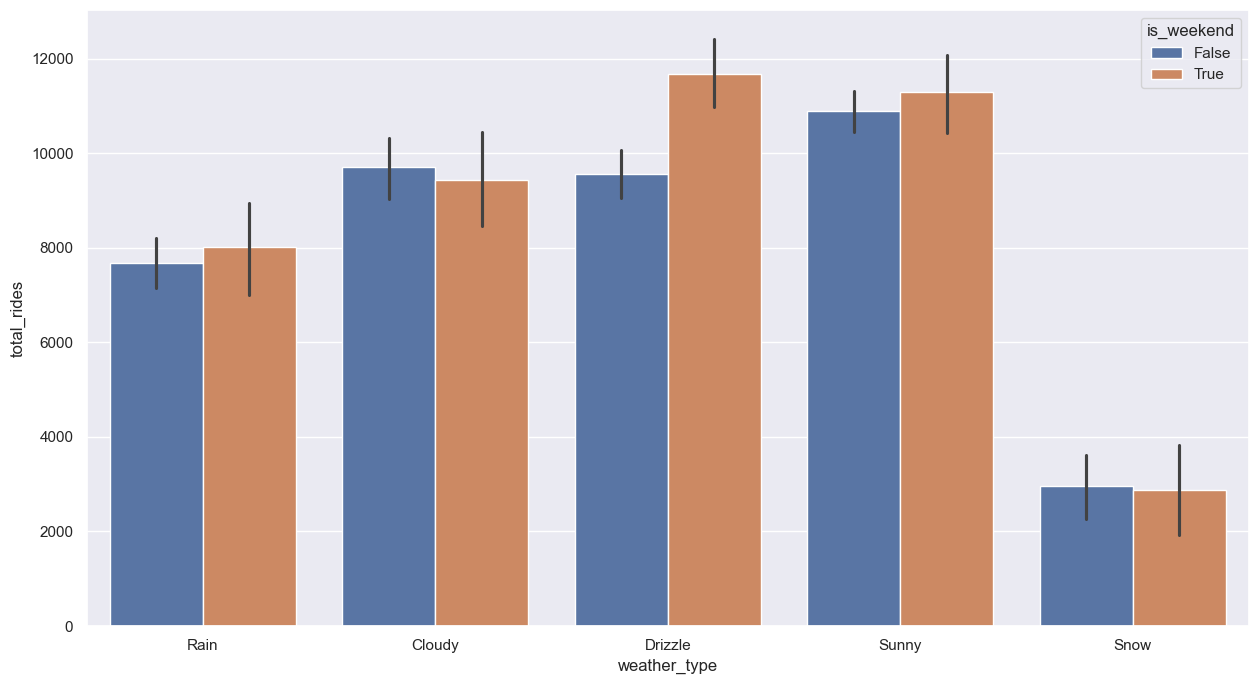

In [123]:
#Observation: most rides on weekends 
sns.barplot(data=df_daily, x="weather_type",y="total_rides", hue="is_weekend")

In [124]:
df_daily.head(2)


,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%),season,windiness
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39,winter,no_wind
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74,winter,no_wind


In [125]:
#df_daily['climate'] = df_daily['climate'].replace({'cold': 0, 'temperate': 1, 'warm': 2})
#df_daily['is_holiday'] = df_daily['is_holiday'].astype(int)
#df_daily['is_weekend'] = df_daily['is_weekend'].astype(int)
no_strings = df_daily.drop(columns=["date","season","windiness","weather_type","weather_description","weekday_name"
                                    ,"casual","member","weekday"])


#from sklearn.preprocessing import OneHotEncoder

# Assuming 'category' is a categorical column
#ohe = OneHotEncoder(handle_unknown='ignore')
#ohe.fit(no_strings[["is_weekend"]])
#no_strings["is_weekend"] = ohe.transform(no_strings[["is_weekend"]])
#ohe.fit(no_strings[["is_holiday"]])
#no_strings["is_holiday"] = ohe.transform(no_strings[["is_holiday"]])

le = LabelEncoder()

# Fit the LabelEncoder to the data
#le.fit(["low","medium","high"])
le.fit(["cold","temperate","warm"])
le.classes_

# Transform the data into numerical labels
no_strings["climate"] = le.transform(no_strings["climate"])

le.fit(["True","False"])

le.classes_

# Transform the data into numerical labels
no_strings["is_holiday"] = le.transform(no_strings["is_holiday"])

# Transform the data into numerical labels
no_strings["is_weekend"] = le.transform(no_strings["is_weekend"])

In [126]:
no_strings.head(3)

,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,is_weekend,is_holiday,percentage_members_vs_casuals(%)
0,961,-0.9,2.3,63,10.6,0,0,1,61.39
1,5718,4.8,7.6,61,19.1,0,1,0,49.74
2,1628,0.9,3.9,63,13.0,0,1,0,69.59


In [127]:
#Prepping dataframe for correlation map and machine learning
                            #variables that will give away the trend to the AI
                                #"casual"
                                #"member"
                                #"total_rides" ?

# specify the column to move 
col_to_move = 'total_rides'

# pop the column from its original position
moved_col = no_strings.pop(col_to_move)

# insert the column at the last position (default is -1, which means the end)
no_strings.insert(len(no_strings.columns), col_to_move, moved_col)

no_strings.head(2)


,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,is_weekend,is_holiday,percentage_members_vs_casuals(%),total_rides
0,-0.9,2.3,63,10.6,0,0,1,61.39,961
1,4.8,7.6,61,19.1,0,1,0,49.74,5718


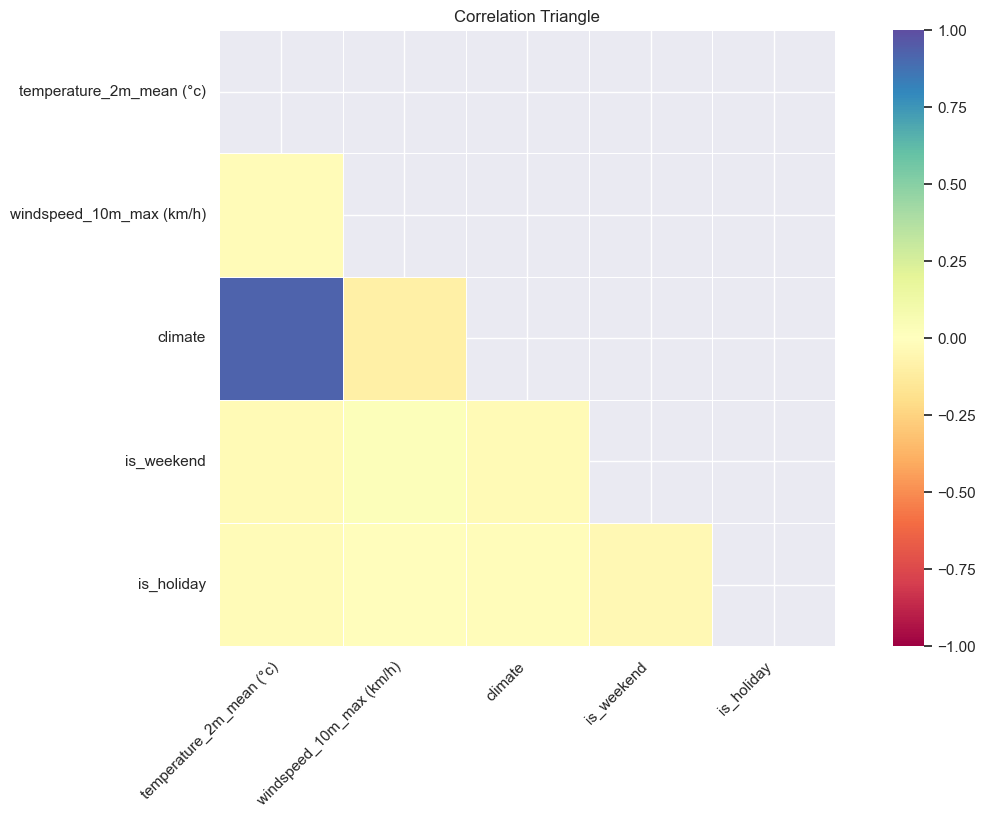

In [128]:

###Heat map for all data points to evaluate correlations 
for_heatmap = no_strings.drop(["total_rides","percentage_members_vs_casuals(%)","apparent_temperature_mean (°c)","weathercode (wmo code)"],axis=1,inplace=False)
#correlation map
corrmap = for_heatmap.corr()
# Generate a mask for the upper triangular part
mask = np.triu(np.ones_like(corrmap, dtype=bool))

#plot heatmap triangle 
ax = sns.heatmap(
    corrmap, mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap="Spectral",
    square=True,
    linewidths=0.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation Triangle")
sns.set(rc = {'figure.figsize':(15,8)})

In [129]:
no_strings.head(2)

,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,is_weekend,is_holiday,percentage_members_vs_casuals(%),total_rides
0,-0.9,2.3,63,10.6,0,0,1,61.39,961
1,4.8,7.6,61,19.1,0,1,0,49.74,5718


In [169]:
#Split data set
###Can do 1 ML model for percentage_members, and another for Linear Reg for total rides!!


#ML for total rides



#["apparent_temperature_mean (°c)","temperature_2m_mean (°c)","windspeed_10m_max (km/h)","percentage_members_vs_casuals(%)"]


#last drops, we are trying to predict total rides 
#before_X = no_strings.drop(["total_rides","weathercode (wmo code)"],axis=1,inplace=False) #dropping total_rides

before_X = no_strings.drop(["total_rides","percentage_members_vs_casuals(%)","apparent_temperature_mean (°c)","weathercode (wmo code)"],axis=1,inplace=False) #dropping total_rides
print(before_X.isnull().sum())
X = before_X # --> the features we will keep to build our model
y = no_strings["total_rides"] # --> what you're trying to predict

#X.info()
#y.info()
# Example:

#print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#X_test.describe()

temperature_2m_mean (°c)    0
windspeed_10m_max (km/h)    0
climate                     0
is_weekend                  0
is_holiday                  0
dtype: int64


In [131]:

#Checking value counts for quality_labels
y_train.value_counts()
y_train.shape
#y_test.value_counts()

(876,)

In [132]:
X_train.shape
#X_test
#y_train
#y_test

(876, 5)

In [133]:
X_train.head(5)

,temperature_2m_mean (°c),windspeed_10m_max (km/h),climate,is_weekend,is_holiday
6,2.9,14.4,0,0,0
575,25.6,12.9,2,1,0
821,8.9,25.0,0,1,0
1063,0.9,8.9,0,0,0
905,25.2,10.1,2,1,0


In [134]:

#Scale data
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
#Scaler = MinMaxScaler().fit(X_train)
Scaler = StandardScaler()

# transform training data
#X_train_scaled = Scaler.transform(X_train)
#X_test_scaled = Scaler.transform(X_test)
#y_train_scaled = Scaler.transform(y_train)
#y_test_scaled = Scaler.transform(y_test)
# Define scaler

# Define scaler
scaler = StandardScaler()
"percentage_members_vs_casuals(%)","apparent_temperature_mean (°c)"
# Scale variables
X_train_scaled = scaler.fit_transform(X_train[["temperature_2m_mean (°c)",
                                               "windspeed_10m_max (km/h)",]])
X_test_scaled = scaler.fit_transform(X_test[["temperature_2m_mean (°c)",
                                              "windspeed_10m_max (km/h)"]])

# X_train_scaled = scaler.fit_transform(X_train[["apparent_temperature_mean (°c)","temperature_2m_mean (°c)",
#                                                "windspeed_10m_max (km/h)","percentage_members_vs_casuals(%)"]])
# X_test_scaled = scaler.fit_transform(X_test[["apparent_temperature_mean (°c)","temperature_2m_mean (°c)",
#                                               "windspeed_10m_max (km/h)","percentage_members_vs_casuals(%)"]])

#y_train = scaler.fit_transform(y_train[["apparent_temperature_mean (°c)","temperature_2m_mean (°c)",
#                                              "windspeed_10m_max (km/h)","percentage_members_vs_casuals(%)"]])

#y_train_scaled = scaler.fit_transform(no_strings["total_rides"])  # Assuming mpg is a single column


#y_test_scaled = scaler.fit_transform(y_test)  # Assuming mpg is a single column
# Verify scaled values
print(X_train_scaled.shape)  # (n_samples, n_features)
print(X_test_scaled.shape)  # (n_samples, n_features)
#print(y_test.shape)
print(y_train.shape)  # (n_samples,)
#print(y_test_scaled.shape)  # (n_samples,)


(876, 2)
(219, 2)
(876,)


In [135]:
X_train_scaled

array([[-1.20223835, -0.28014554],
       [ 1.18457003, -0.5443086 ],
       [-0.57136389,  1.58660681],
       ...,
       [ 0.52215184,  0.47712192],
       [-1.01297601, -0.26253466],
       [ 0.43803525, -1.26635432]])

In [ ]:
# Verify scaled values
print(X_train_scaled.shape)  # (n_samples, n_features)
print(X_test_scaled.shape)  # (n_samples, n_features)
#X-test might be the issue here 
#print(y_test.shape)
print(y_train.shape)  # (n_samples,)
#print(y_test_scaled.shape)  # (n_samples,)

        # Assuming x and y have different shapes
#X_train_scaled = np.array(X_train_scaled.reshape(-1, 1))  # (3, 2)
#X_test_scaled = np.array(X_test_scaled.reshape(-1, 1))
#y = np.array(y_train.reshape(-1, 1))  # (2,)

print(X_train_scaled.shape)
#print(y.shape)
print(X_test_scaled.shape)

(876, 2)
(219, 2)
(876,)
(876, 2)
(219, 2)


In [137]:
#y_test.head(5)
y_test.shape

(219,)

Coefficients: 
 [2527.93591265 -224.63549621]
[11144.55597159 11810.94800432  8879.09756591 10460.18205731
 12228.75030798  8408.51058744 11615.03861595 12881.12428805
  5184.28333321  6828.45238523 13998.52316956 12382.8881942
 10029.20966848 12188.60740049 13406.97250347 11129.37030182
 11810.94800432 11967.27979686  7033.53103609  7220.5908116
  6392.45288451 13210.46080964 12936.385525   10084.61223335
 12721.99628374  6356.83911756  7372.74345974  6256.65352326
 10474.98073715  9544.106666    9201.1760755   5788.54310693
 12980.56624898  5456.87135111 11785.24713323 12832.66008556
  7517.57075556  9287.34361714  9365.18986378 12794.53276267
  7412.81902692  9346.74700469  5010.35664907 10836.67383637
 12762.77849049 11337.70614199  8470.85151467 12419.84789998
  9242.88023733  9176.53848741  9976.7446433   6053.6274508
  7285.90627233 12707.056276    8920.3037564   5636.24913088
  9850.57552208  7904.82339796 11715.50686608  6465.59166889
 11343.01590971  6021.12954525 10866.65818

ValueError: x and y must have same first dimension, but have shapes (876,) and (219,)

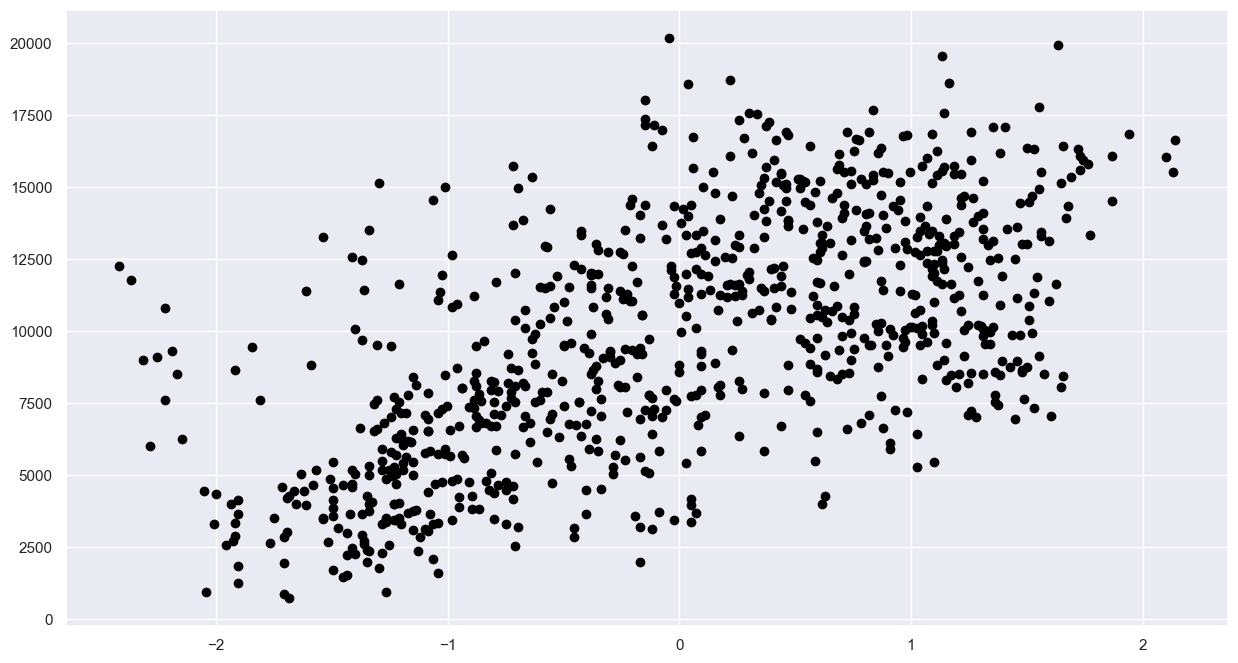

In [173]:
#Linear regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled,y_train)

# Make predictions using the testing set
preds_Linear = regr.predict(X_test_scaled)

# The coefficients
print("Coefficients: \n", regr.coef_)
print(preds_Linear)
# The mean squared error

mse = mean_squared_error(y_test, preds_Linear)
print("Mean squared error:", mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, preds_Linear))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,preds_Linear)
print("This is the R squared Test result:", r2)

# Plot outputs


plt.scatter(X_train_scaled[:,0], y_train, color="black")
plt.plot(X_train_scaled[:,0], preds_Linear, color="blue", linewidth=3)
#
plt.xticks(())
plt.yticks(())
#
plt.show()

In [166]:
print(y_test.shape)
print(preds_Linear.shape)
answers = pd.Series(y_test)
preds = pd.Series(preds_Linear)

result_y_predsvstest = pd.concat([answers, preds], axis=1)
result_y_predsvstest.columns = ["Test Answers","Predicted Values"]
result_y_predsvstest.head(5)



(219,)
(219,)


,Test Answers,Predicted Values
533,16757.0,NaN
139,8748.0,12762.741497
88,9551.0,7137.717453
841,10163.0,NaN
985,17369.0,NaN


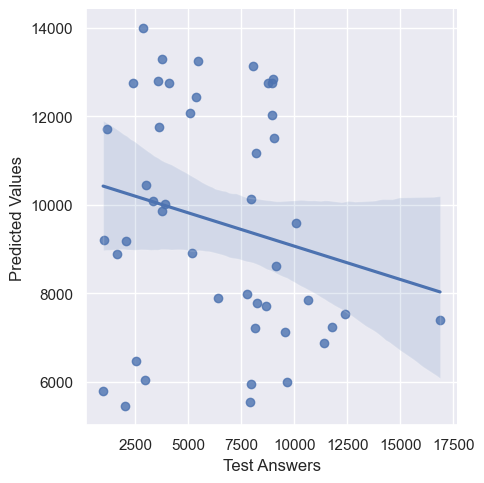

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset with x and y columns
#sns.lineplot(x=y_test, y= preds_Linear, ci=0.95)  # 95% confidence interval

sns.lmplot(data=result_y_predsvstest, x="Test Answers", y="Predicted Values")